In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# create the df

df = pd.read_csv('laptop_price.csv',encoding_errors='ignore')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [3]:
# size of the dataframe

df.shape

(1303, 13)

There are 1303 rows and 13 columns in the dataframe.

In [4]:
# check for missing values

df.isna().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

There are no missing values in the data

In [5]:
# make all the columns in the data frame as lowercase

df.columns = df.columns.str.lower()

In [6]:
# remove the redundant index column

print('The number of unique items in the column',df['laptop_id'].nunique())

The number of unique items in the column 1303


The number of unique values is equal to the index of the dataframe which shows that it is a redundant index column and can be dropped from the dataframe.

In [7]:
# drop the laptop id column

df.drop(labels=['laptop_id'],axis=1,inplace=True)

In [8]:
# check for the info of the df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1303 non-null   object 
 1   product           1303 non-null   object 
 2   typename          1303 non-null   object 
 3   inches            1303 non-null   float64
 4   screenresolution  1303 non-null   object 
 5   cpu               1303 non-null   object 
 6   ram               1303 non-null   object 
 7   memory            1303 non-null   object 
 8   gpu               1303 non-null   object 
 9   opsys             1303 non-null   object 
 10  weight            1303 non-null   object 
 11  price_euros       1303 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


1. Categorical Columns:
- company
- product
- typename
- opsys

2. Numerical Columns:
- inches
- screen resolution
- ram
- weight
- price

3. Mixed type columns:
- cpu
- memory
- gpu

**Change column names**

- product --> model
- typename --> type
- inches --> size
- screenresolution --> screen
- memory --> storage
- opsys --> os
- price_euros --> price

In [9]:
# change column names

col_names = {
    'product':'model',
    'typename':'type',
    'inches':'size',
    'screenresolution':'screen',
    'memory':'storage',
    'opsys':'os',
    'price_euros':'price'
}

df.rename(columns=col_names,inplace=True)

In [10]:
# check for duplicate values

df.duplicated(subset=df.columns[0:11],keep='first').sum()

51

- There are 51 duplicate rows in the data

In [11]:
# percentage of duplicate rows

df.duplicated(subset=df.columns[0:11],keep='first').mean() * 100

3.9140445126630854

Around 4% of the data is duplicated.

In [12]:
# remove the duplicates 

print('The number of rows in df before removal of duplicates',df.shape[0])

df.drop_duplicates(subset=df.columns[0:11],keep='first',inplace=True)

print('The number of rows after removal of duplicates',df.shape[0])

The number of rows in df before removal of duplicates 1303
The number of rows after removal of duplicates 1252


In [13]:
# convert the price from euros to INR
# Average taken for the year 2021-2022 in which the data was generated 

exchange_rate = 87.44

# convert and round off to 2 decimal places

df['price'] = np.round(a=df['price'] * 87.44,decimals=2)


In [14]:
# statistical summary of num columns

df.describe()

,size,price
count,1252.000000,1252.000000
mean,15.033946,99053.266278
std,1.416644,61526.375311
min,10.100000,15214.560000
25%,14.000000,52592.975000
50%,15.600000,86259.560000
75%,15.600000,130346.807500
max,18.400000,533296.560000


## Exploratory Data Analysis

### Company

In [15]:
from collections import Counter

In [16]:
# number and names of companies

print('Number of different Laptop Manufacturers',df['company'].nunique())

laptop_producers = Counter(df['company'])

for key,val in laptop_producers.items():
    print(f'{key} --> {val}')

Number of different Laptop Manufacturers 19
Apple --> 21
HP --> 265
Acer --> 100
Asus --> 152
Dell --> 282
Lenovo --> 280
Chuwi --> 3
MSI --> 54
Microsoft --> 6
Toshiba --> 47
Huawei --> 2
Xiaomi --> 4
Vero --> 4
Razer --> 7
Mediacom --> 7
Samsung --> 9
Google --> 3
Fujitsu --> 3
LG --> 3


In [17]:
# top 10 producers

top_10_companies = df['company'].value_counts().nlargest(10)
top_10_companies

Dell       282
Lenovo     280
HP         265
Asus       152
Acer       100
MSI         54
Toshiba     47
Apple       21
Samsung      9
Razer        7
Name: company, dtype: int64

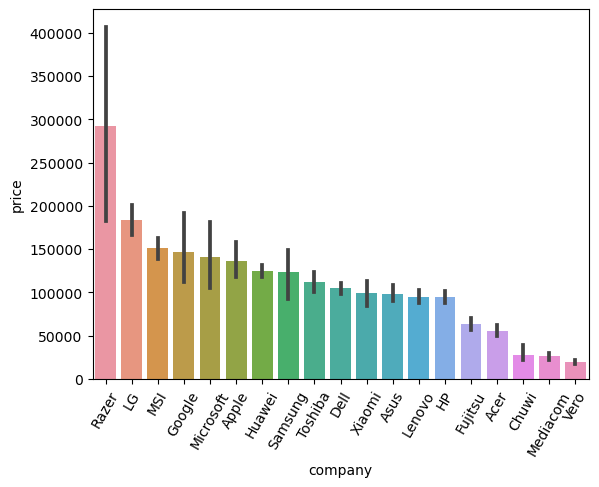

In [18]:
# average price of laptops based on company

order_by_price = df.groupby(by=['company'])['price'].mean().sort_values(ascending=False).index

sns.barplot(x='company',y='price',data=df,order=order_by_price)
plt.xticks(rotation=60)
plt.show()

- The company column affects the price of the laptops.
- The razer laptops seems to be an outlier in the average price of laptops.

**One of the important columns to tell the price of laptops**

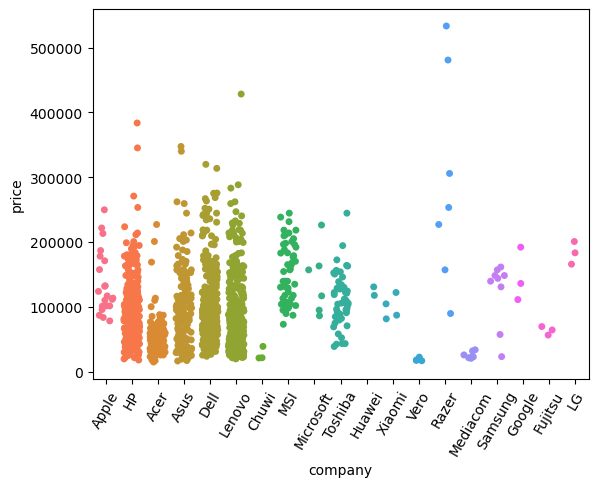

In [19]:
# plot the plot of price and company points

sns.stripplot(x='company',y='price',data=df,jitter=0.3,hue='company')
plt.legend().set_visible(False)
plt.xticks(rotation=60)
plt.show()

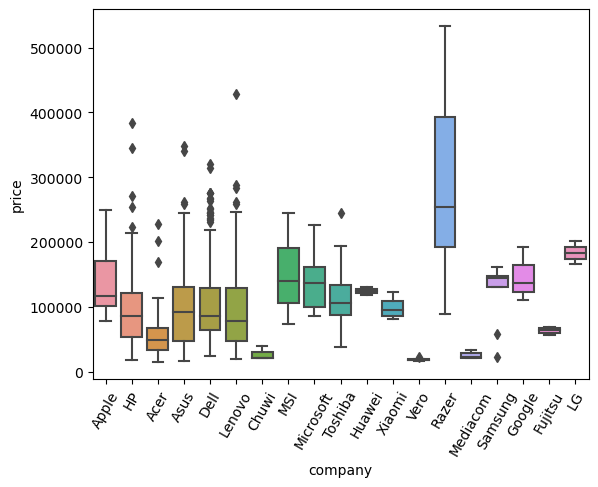

In [20]:
# outliers in the price based on company column

sns.boxplot(x='company',y='price',data=df)
plt.xticks(rotation=60)
plt.show()

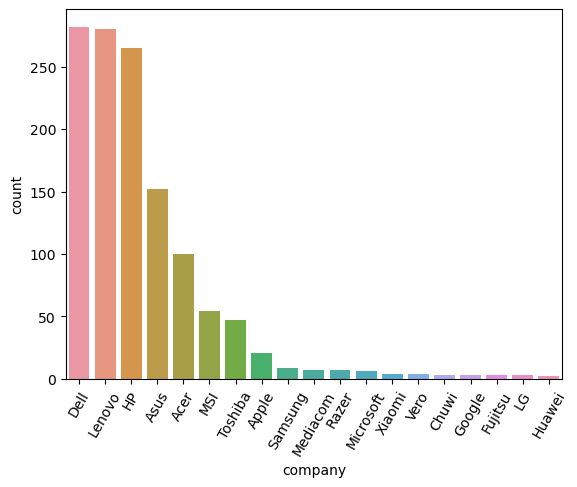

In [21]:
# distribution of the count of columns

order_by_count = df['company'].value_counts().sort_values(ascending=False).index

sns.countplot(x='company',data=df,order=order_by_count)
plt.xticks(rotation=60)
plt.show()

**Keep the 10 largest categories in the data and merge the rest as a separate category**

In [22]:
# merge the categories

def define_company_cat(category):
    if category in top_10_companies:
        return category
    else:
        return 'others'

df['company'] = df['company'].apply(define_company_cat)

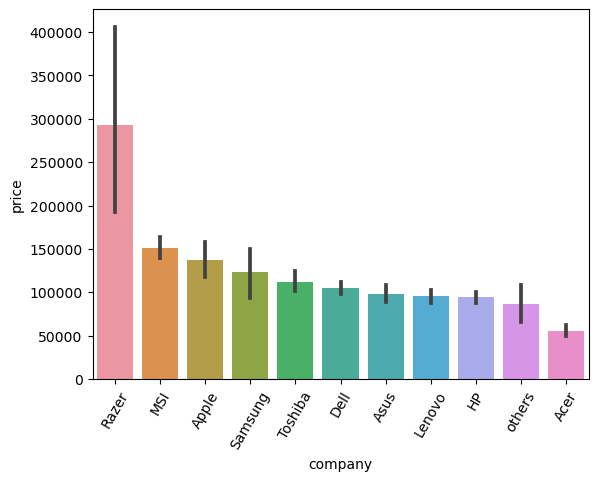

In [23]:
# average price of laptops based on company after transformation

order_by_price = df.groupby(by=['company'])['price'].mean().sort_values(ascending=False).index

sns.barplot(x='company',y='price',data=df,order=order_by_price)
plt.xticks(rotation=60)
plt.show()

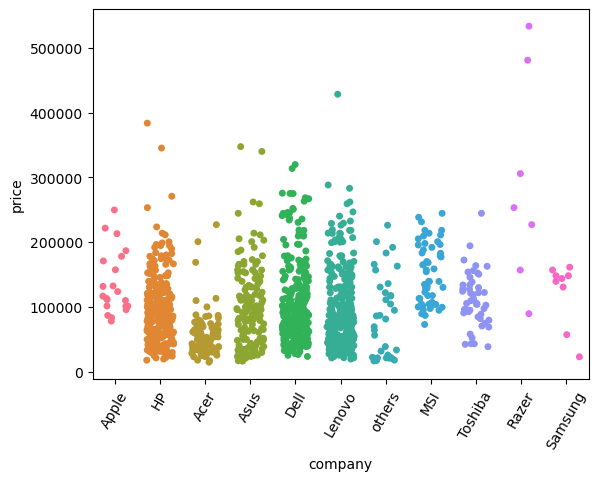

In [24]:
# plot the plot of price and company points after transformation

sns.stripplot(x='company',y='price',data=df,jitter=0.3,hue='company')
plt.legend().set_visible(False)
plt.xticks(rotation=60)
plt.show()

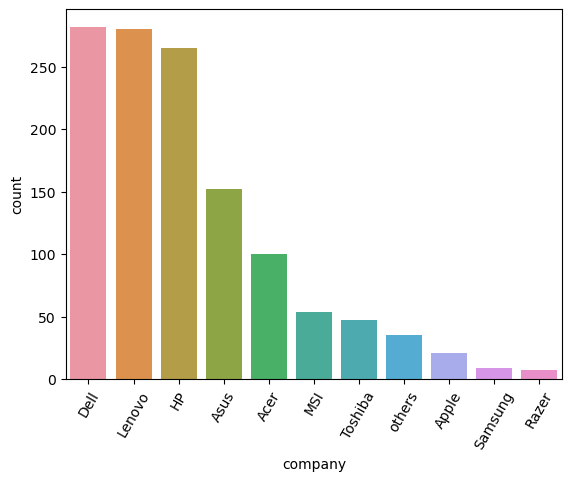

In [25]:
# distribution of the count of laptops after transformation

order_by_count = df['company'].value_counts().sort_values(ascending=False).index

sns.countplot(x='company',data=df,order=order_by_count)
plt.xticks(rotation=60)
plt.show()

Now many of the brands get higher representation in the data as compared to earlier.

### Type

In [26]:
# categories and percentage share in type column

print('The number of different types of laptops are',df['type'].nunique())

df['type'].value_counts(normalize=True) * 100

The number of different types of laptops are 6


Notebook              55.431310
Gaming                16.373802
Ultrabook             15.175719
2 in 1 Convertible     8.865815
Workstation            2.316294
Netbook                1.837061
Name: type, dtype: float64

- Almost more than 50% laptops are of `Notebook` category.
- The other major share is shared by `Gaming` and `Ultrabook` category.

In [27]:
# lowercase the category names in the column

df['type'] = df['type'].str.lower()

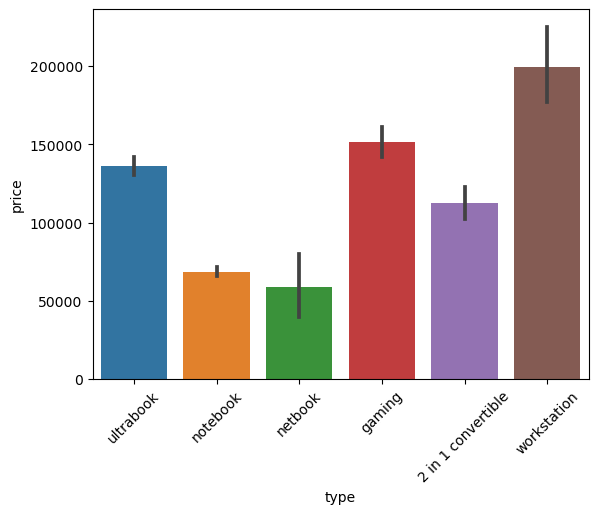

In [28]:
# mean price of laptops based on type of laptop

sns.barplot(x='type',y='price',data=df)
plt.xticks(rotation=45)
plt.show()

**Type of the laptop also has an impact on the price of the laptop**

In [29]:
# median price of laptops based on type

type_price_summary = df.groupby(by=['type'])['price'] \
.agg(func=['mean','median']) \
.apply(np.round,args=[2]) \
.sort_values(by='mean')

type_price_summary

,mean,median
type,,
netbook,58880.58,31041.20
notebook,68420.56,60246.16
2 in 1 convertible,112373.48,104840.56
ultrabook,136238.55,131072.56
gaming,151391.92,130530.43
workstation,199394.59,180554.86


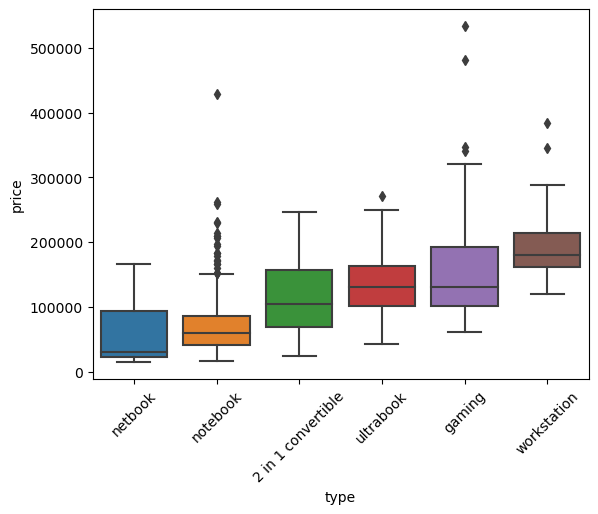

In [30]:
# check for outliers depending on the type of laptop

sns.boxplot(x='type',y='price',data=df,order=type_price_summary.index)
plt.xticks(rotation=45)
plt.show()

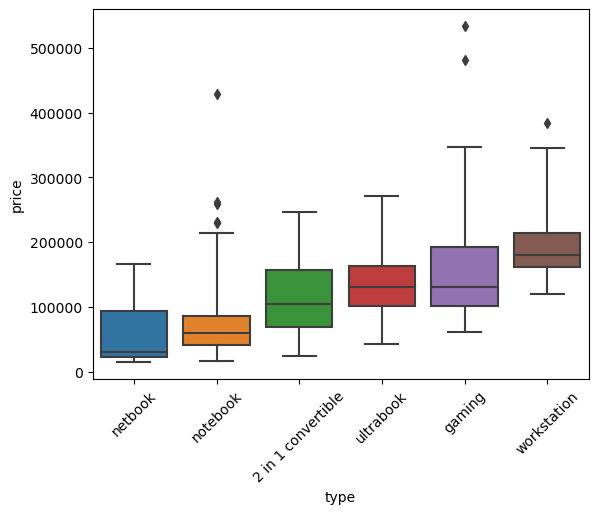

In [31]:
# extreme outliers

sns.boxplot(x='type',y='price',
            data=df,order=type_price_summary.index,
           whis=3)
plt.xticks(rotation=45)
plt.show()

In [32]:
# brands producing which type of laptops

contingency_type = pd.crosstab(columns=df['type'],index=df['company'])

contingency_type['most_frequent'] = contingency_type.idxmax(axis=1)

contingency_type

type,2 in 1 convertible,gaming,netbook,notebook,ultrabook,workstation,most_frequent
company,,,,,,,
Acer,8,8,5,75,4,0,notebook
Apple,0,0,0,0,21,0,ultrabook
Asus,13,54,4,63,18,0,notebook
Dell,30,40,2,152,47,11,notebook
HP,18,12,7,178,36,14,notebook
Lenovo,39,32,4,172,29,4,notebook
MSI,0,54,0,0,0,0,gaming
Razer,0,5,0,0,2,0,gaming
Samsung,2,0,1,1,5,0,ultrabook


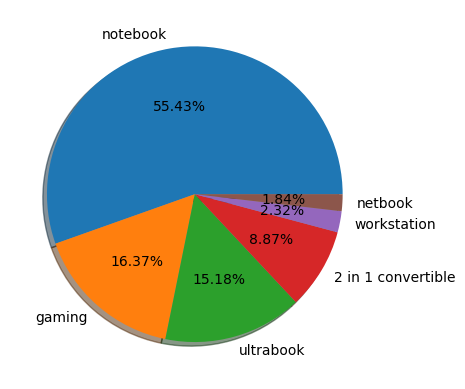

In [33]:
# distribution of laptop types

plt.pie(x=df['type'].value_counts(),autopct='%0.2f%%',
        labels=df['type'].value_counts().index,shadow=True)
plt.show()

- The dominant category in the market is `notebook` type of laptops and the second most dominant are the `gaming` laptops.

In [34]:
# columns in the data

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1252 entries, 0 to 1274
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   company  1252 non-null   object 
 1   model    1252 non-null   object 
 2   type     1252 non-null   object 
 3   size     1252 non-null   float64
 4   screen   1252 non-null   object 
 5   cpu      1252 non-null   object 
 6   ram      1252 non-null   object 
 7   storage  1252 non-null   object 
 8   gpu      1252 non-null   object 
 9   os       1252 non-null   object 
 10  weight   1252 non-null   object 
 11  price    1252 non-null   float64
dtypes: float64(2), object(10)
memory usage: 127.2+ KB


### Model

In [35]:
# different product categories

print('The number of unique categories of model are',df['model'].nunique())

The number of unique categories of model are 618


- The model column has too many categories.
- Some laptops have same model name but different configurations.

In [36]:
# check for duplicates in model column

print('The number of duplicate model names',df['model'].duplicated().sum())

display(df[df.duplicated(subset='model',keep=False)] \
        .iloc[[0,3,4,6]] \
        .sort_values('size'))

The number of duplicate model names 634


,company,model,type,size,screen,cpu,ram,storage,gpu,os,weight,price
0,Apple,MacBook Pro,ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,117142.49
4,Apple,MacBook Pro,ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,157706.78
3,Apple,MacBook Pro,ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,221874.63
6,Apple,MacBook Pro,ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,187118.98


**The model name of the laptop is same but the specifications are different**

> Drop the model column from the data

In [37]:
# drop the model column

df.drop(columns='model',inplace=True)

### Size

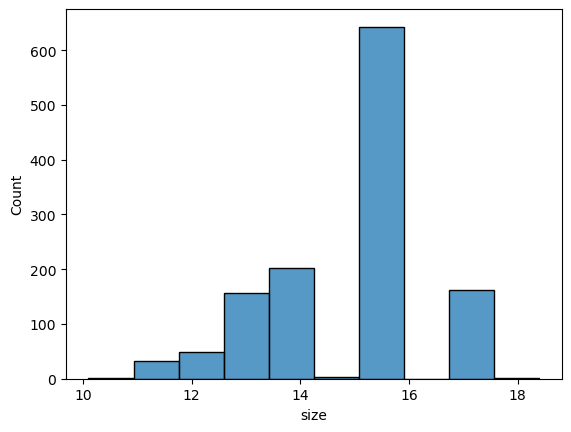

In [38]:
# distribution of the size column

sns.histplot(x='size',bins=10,data=df)
plt.show()

In [39]:
# number of unique categories in the size column

print('Different unique screen sizes of laptops -->',df['size'].nunique())

# categories
display(df['size'].value_counts())

Different unique screen sizes of laptops --> 18


15.6    639
14.0    191
17.3    161
13.3    155
12.5     38
11.6     31
12.0      6
13.5      6
12.3      5
15.4      4
13.9      4
15.0      4
10.1      2
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: size, dtype: int64

**Size column is a discrete numerical column**

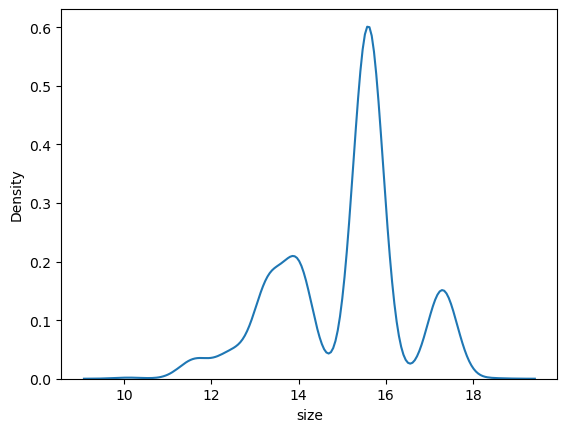

In [40]:
# kde plot of the size column

sns.kdeplot(x='size',data=df)
plt.show()


- The screen size appears to be left skewed.

In [41]:
# skewness of screen size column

df['size'].skew()

-0.4124548733303541

**Negative skewness does indicate that the size distribution is slightly left skewed**

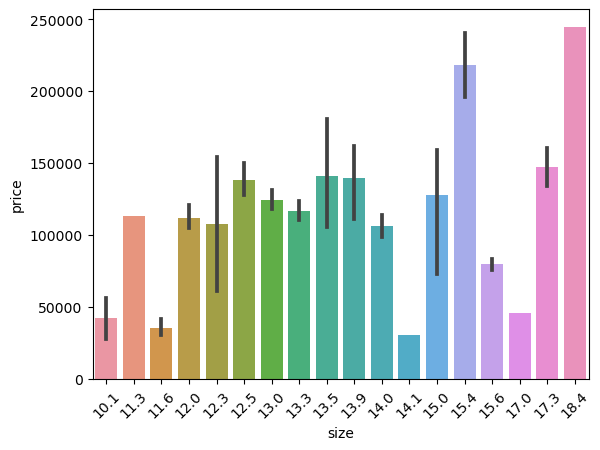

In [42]:
# mean price and screen size of laptops

sns.barplot(x='size',y='price',data=df)
plt.xticks(rotation=45)
plt.show()

In [43]:
# value counts of screen size column

size_val_counts = df['size'].value_counts()
size_val_counts

15.6    639
14.0    191
17.3    161
13.3    155
12.5     38
11.6     31
12.0      6
13.5      6
12.3      5
15.4      4
13.9      4
15.0      4
10.1      2
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: size, dtype: int64

**The minority categories can be merged into nearby majority categories**
- This can be done by calculating the distances and merging into the nearest category.

In [44]:
# create a dictionary to replace

majority_size = size_val_counts[size_val_counts > 10].sort_index().index
minority_size = size_val_counts[size_val_counts <= 10].sort_index().index

# calculate the distances
size_dict = {}

# create arrays:

majority_size = np.array(majority_size)
minority_size = np.array(minority_size)

for num in minority_size:
    distance = np.abs(majority_size - num)
    idx = np.argmin(distance)
    size_dict[num] = majority_size[idx]
    
size_dict


{10.1: 11.6,
 11.3: 11.6,
 12.0: 11.6,
 12.3: 12.5,
 13.0: 13.3,
 13.5: 13.3,
 13.9: 14.0,
 14.1: 14.0,
 15.0: 15.6,
 15.4: 15.6,
 17.0: 17.3,
 18.4: 17.3}

In [45]:
# replace the sizes 

df['size'].replace(size_dict,inplace=True)

In [46]:
# value counts of screen size column

df['size'].value_counts()

15.6    647
14.0    196
13.3    163
17.3    163
12.5     43
11.6     40
Name: size, dtype: int64

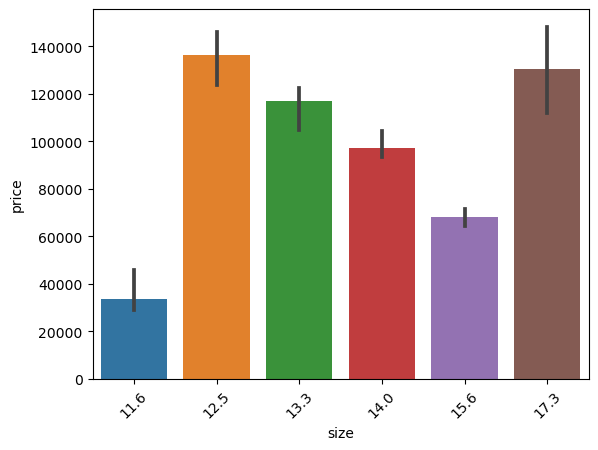

In [47]:
# median price and screen size of laptops

sns.barplot(x='size',y='price',data=df,estimator='median')
plt.xticks(rotation=45)
plt.show()

- Screen sizes do affect the prize of the laptops but the relation is not linear.
- Price of the laptops depends more on other factors apart from the screen size.

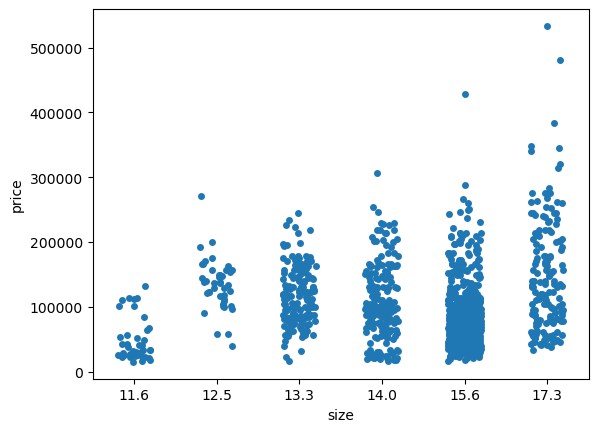

In [48]:
# distribution of data points

sns.stripplot(x='size',y='price',data=df,jitter=0.2)
plt.show()

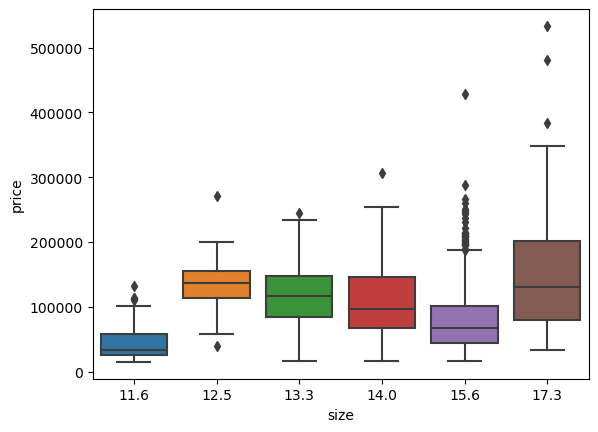

In [49]:
# outliers in the price based on size of screen

sns.boxplot(x='size',y='price',data=df)
plt.show()

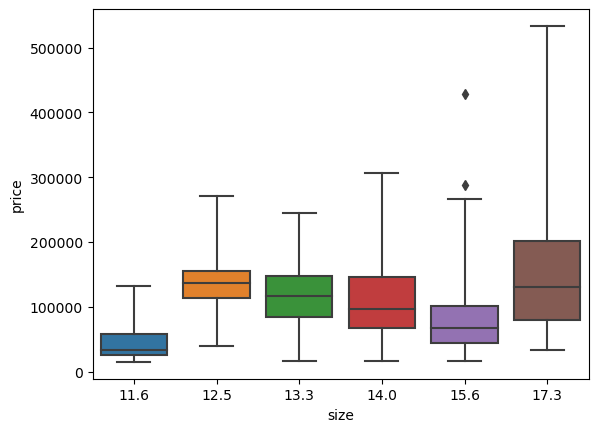

In [50]:
# extreme outliers in the price based on size of screen

sns.boxplot(x='size',y='price',data=df,whis=3)
plt.show()

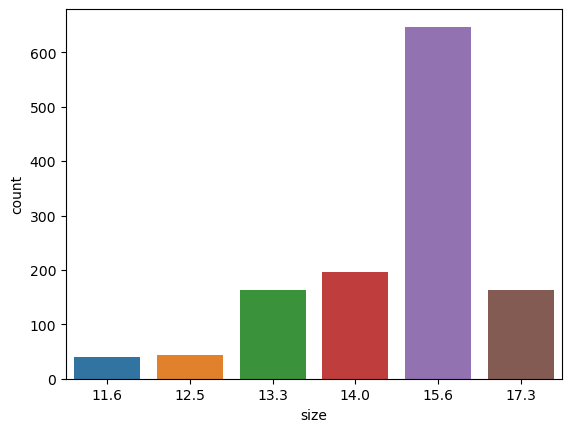

In [51]:
# number of laptops in each screen size category

sns.countplot(x='size',data=df)
plt.show()

- Majority of the laptops comes in the 15.6 size category.

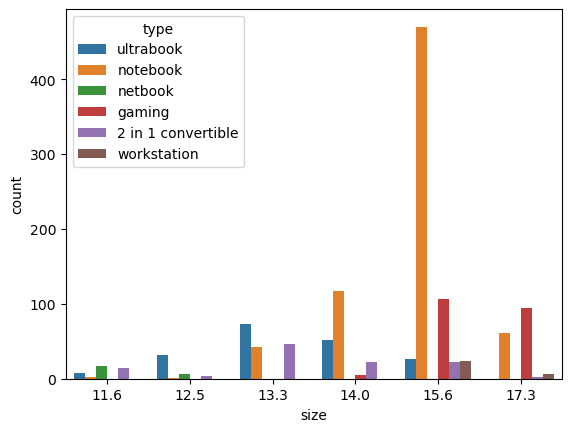

In [52]:
# number of laptops in each screen size category

sns.countplot(x='size',data=df,hue='type')
plt.show()

- `notebooks`,`ultrabooks`,`2 in convertible` have sceen sizes in almost all categories.
- `workstation` and `gaming` laptops have larger screen sizes in majority.
- `netbooks` support smaller screen sizes in the 11.6 and 12.5 segments.

In [53]:
# correlation between the screen size and the price of laptops

df.corr(numeric_only=True).loc['size','price']

0.06623821517065286

- The variables are not very much correlated to each other and shows a very slight positive correlation only.
- This means that the price column does not get affected very much by the screen size of the laptops.

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1252 entries, 0 to 1274
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   company  1252 non-null   object 
 1   type     1252 non-null   object 
 2   size     1252 non-null   float64
 3   screen   1252 non-null   object 
 4   cpu      1252 non-null   object 
 5   ram      1252 non-null   object 
 6   storage  1252 non-null   object 
 7   gpu      1252 non-null   object 
 8   os       1252 non-null   object 
 9   weight   1252 non-null   object 
 10  price    1252 non-null   float64
dtypes: float64(2), object(9)
memory usage: 117.4+ KB


### CPU

In [55]:
# different models of cpus

df['cpu'].value_counts()

Intel Core i5 7200U 2.5GHz     188
Intel Core i7 7700HQ 2.8GHz    143
Intel Core i7 7500U 2.7GHz     128
Intel Core i5 8250U 1.6GHz      70
Intel Core i5 6200U 2.3GHz      66
                              ... 
Intel Core i3 6100U 2.1GHz       1
AMD E-Series E2-9000 2.2GHz      1
Intel Core M M3-6Y30 0.9GHz      1
Intel Core i5 2.9GHz             1
AMD A9-Series 9410 2.9GHz        1
Name: cpu, Length: 118, dtype: int64

In [56]:
# unique values of cpu models

print('The number of unique cpu models are',df['cpu'].nunique())

# unique cpu model names
df['cpu'].unique()

The number of unique cpu models are 118


array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [57]:
import re

amd_pat = re.compile('AMD.\w*')
intel_pat = re.compile('Intel.\w+.\w+')

def get_cpu_name(text):
    if "Intel" in text:
        return re.findall(intel_pat,text)[0]
    elif 'AMD' in text:
        return re.findall(amd_pat,text)[0]
    else:
        return 'others'

In [58]:
# extract the cpu names

df['cpu_model'] = df['cpu'].apply(get_cpu_name)

In [59]:
# frequency count of cpu models

df['cpu_model'].value_counts()

Intel Core i7         501
Intel Core i5         417
Intel Core i3         134
Intel Celeron Dual     70
Intel Pentium Quad     27
Intel Core M           17
AMD A9                 15
AMD A6                 11
AMD E                   9
Intel Atom x5           8
Intel Celeron Quad      8
AMD A12                 7
AMD A10                 6
AMD A8                  4
AMD Ryzen               4
Intel Xeon E3           4
Intel Pentium Dual      3
Intel Atom X5           2
AMD FX                  2
AMD A4                  1
Intel Atom Z8350        1
others                  1
Name: cpu_model, dtype: int64

In [60]:
# contingency table of cpu model and type of laptops

cpu_frequency_table = pd.crosstab(index=df['cpu_model'],columns=df['type'])

# count the cpu models in only 1 or 2 categories and merge them as a single category
def count_cat(row):
    arr = row.values
    count_0 = list(arr).count(0)
    return 6 - count_0

cpu_frequency_table['count_variation'] = cpu_frequency_table.apply(count_cat,axis=1)

In [61]:
# CPU model names to keep

cpu_model_index = cpu_frequency_table[cpu_frequency_table['count_variation'] > 1].index

In [62]:
def cpu_model_transform(model):
    if model in cpu_model_index:
        return model
    else:
        return 'others'
    
df['cpu_model'] = df['cpu_model'].apply(cpu_model_transform)

In [63]:
# frequency count of cpu models after transformation

df['cpu_model'].value_counts()

Intel Core i7         501
Intel Core i5         417
Intel Core i3         134
Intel Celeron Dual     70
others                 51
Intel Pentium Quad     27
Intel Core M           17
AMD A9                 15
Intel Atom x5           8
Intel Celeron Quad      8
Intel Xeon E3           4
Name: cpu_model, dtype: int64

In [64]:
# contingency table of cpu model and type of laptops

cpu_frequency_table = pd.crosstab(index=df['cpu_model'],columns=df['type'])

# count the cpu models in only 1 or 2 categories and merge them as a single category
def count_cat(row):
    arr = row.values
    count_0 = list(arr).count(0)
    return 6 - count_0

cpu_frequency_table['count_variation'] = cpu_frequency_table.apply(count_cat,axis=1)

cpu_frequency_table

type,2 in 1 convertible,gaming,netbook,notebook,ultrabook,workstation,count_variation
cpu_model,,,,,,,
AMD A9,0,0,0,14,1,0,2
Intel Atom x5,2,0,1,5,0,0,3
Intel Celeron Dual,7,0,14,49,0,0,3
Intel Celeron Quad,1,0,1,6,0,0,3
Intel Core M,4,0,1,1,11,0,4
Intel Core i3,5,0,0,127,2,0,3
Intel Core i5,38,30,3,279,65,2,6
Intel Core i7,51,169,2,144,111,24,6
Intel Pentium Quad,2,0,1,24,0,0,3


In [65]:
# create a new column for cpu brand

def get_cpu_brand(cpu):
    if "Intel" in cpu:
        return 'Intel'
    elif 'AMD' in cpu:
        return 'AMD'
    else:
        return 'others'

df['cpu_brand'] = df['cpu'].apply(get_cpu_brand)

df['cpu_brand'].value_counts()

Intel     1192
AMD         59
others       1
Name: cpu_brand, dtype: int64

In [66]:
# check for the cpu in the others category

cpu_to_remove = df[df['cpu_brand'] == 'others'].index

print('The percentage share of others category in cpu brand is ',1/len(df['cpu_brand'])*100)

The percentage share of others category in cpu brand is  0.07987220447284345


- The others category has only 1 Samsung cpu and this row can be removed from the data as it is a very low minority.
- The data point has the percentage very less than 0.1 percent and can be removed from the data.

In [67]:
# drop the category

print('The number of rows before removal',df.shape[0])

df.drop(index=cpu_to_remove,inplace=True)
print('The number of rows after removal',df.shape[0])

The number of rows before removal 1252
The number of rows after removal 1251


In [68]:
# categories in the cpu brand after removal

df['cpu_brand'].value_counts(normalize=True)

Intel    0.952838
AMD      0.047162
Name: cpu_brand, dtype: float64

In [69]:
# price range of laptops based on brand of cpu

price_per_cpu = df.groupby('cpu_brand')['price'].agg(['min','max'])

price_per_cpu['difference'] = price_per_cpu['max'] - price_per_cpu['min']

price_per_cpu

,min,max,difference
cpu_brand,,,
AMD,17400.56,192280.56,174880.0
Intel,15214.56,533296.56,518082.0


- The difference in the price gap of laptops based on cpu_brand for `Intel` is very extreme as compared to `AMD`.

In [70]:
# extract cpu frequency from the cpu column

freq_pat = re.compile('(\d+\.*\d*)GHz')
def extract_cpu_freq(cpu):
    freq = re.findall(freq_pat,cpu)
    if len(freq) > 0:
        return float(freq[0])
    else:
        return 0

df['cpu_freq'] = df['cpu'].apply(extract_cpu_freq)

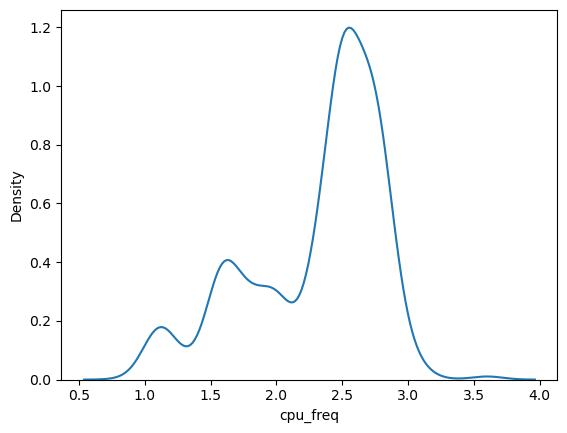

In [71]:
# plot the distribution of cpu frequencies

sns.kdeplot(df['cpu_freq'])
plt.show()

In [72]:
# unique values in the cpu frequency column

print('The number of unique cpu frequency values are',df['cpu_freq'].nunique())

df['cpu_freq'].value_counts()

The number of unique cpu frequency values are 25


2.50    283
2.80    162
2.70    160
1.60    122
2.00     85
2.30     84
2.60     74
1.80     71
1.10     53
2.40     50
2.90     19
3.00     19
1.20     15
2.20     11
1.44     10
1.50     10
1.30      6
3.60      4
3.10      3
2.10      3
1.90      2
0.90      2
3.20      1
1.00      1
1.92      1
Name: cpu_freq, dtype: int64

In [73]:
# skewness of the cpu frequency column

df['cpu_freq'].skew()

-0.8699305224790853

- The cpu frequency column appears to be not normally distributed and is **left skewed**.

In [74]:
# check for normality of the cpu frequency column

from scipy.stats import shapiro

stats,p = shapiro(df['cpu_freq'])

if p <= 0.05:
    print('Reject the null hypothesis. The column is not normally distributed.')
else:
    print('Fail to reject the null hypothesis. The column is normally distributed.')

Reject the null hypothesis. The column is not normally distributed.


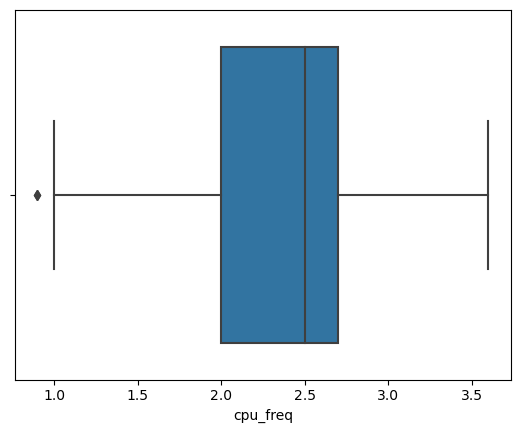

In [75]:
# check for outliers in the cpu frequency column

sns.boxplot(x='cpu_freq',data=df)
plt.show()

In [76]:
# outlier values in the cpu frequency

per_75, per_25 = df['cpu_freq'].quantile(q=[0.75,0.25])
iqr = per_75 - per_25

cpu_freq_outliers = per_25 - (1.5 * iqr)

display(df[df['cpu_freq'] <= cpu_freq_outliers])

print('The lower_bound value of cpu_frequency is',cpu_freq_outliers)

,company,type,size,screen,cpu,ram,storage,gpu,os,weight,price,cpu_model,cpu_brand,cpu_freq
697,Asus,2 in 1 convertible,12.5,Full HD / Touchscreen 1920x1080,Intel Core M M3-6Y30 0.9GHz,4GB,64GB Flash Storage,Intel HD Graphics 515,Chrome OS,1.2kg,58497.36,Intel Core M,Intel,0.9
1261,Asus,ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,1.2kg,63743.76,Intel Core M,Intel,0.9


The lower_bound value of cpu_frequency is 0.9499999999999997


- Cap the values at the lower bound values as it will remove outliers and will have very minimal effect on the data points as they are very near to the lower bound value.

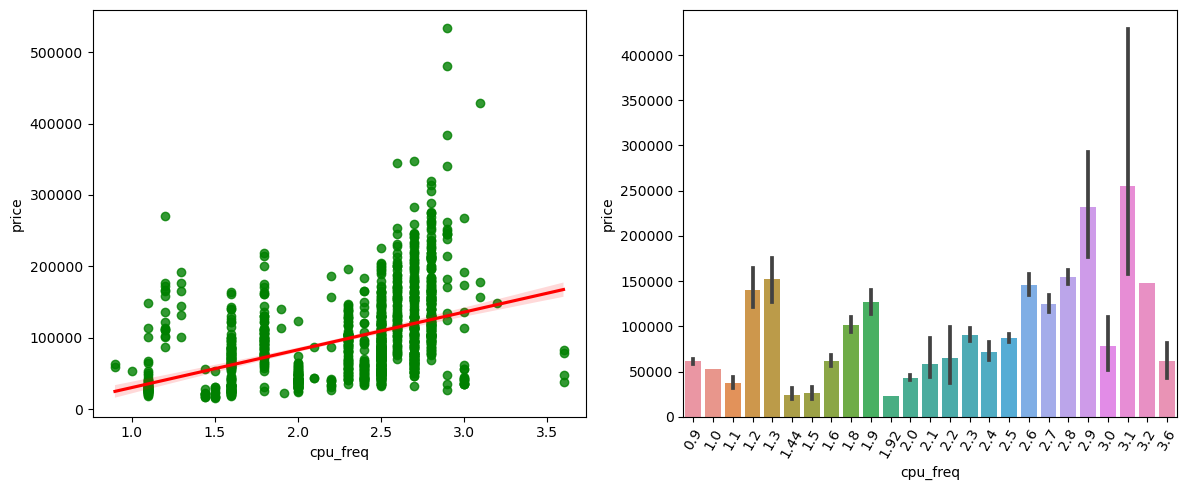

In [77]:
# scatter plot of cpu_freq wrt to price

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.regplot(x='cpu_freq',y='price',
            data=df,color='red',
            scatter_kws={'color':'green'},
            line_kws={'color':'red'})

plt.subplot(1,2,2)
sns.barplot(x='cpu_freq',y='price',data=df)
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

In [78]:
# avg cpu freq on the type of laptop

df.groupby('type')['cpu_freq'].mean().reset_index()

,type,cpu_freq
0,2 in 1 convertible,2.118000
1,gaming,2.722439
2,netbook,1.675652
3,notebook,2.213545
4,ultrabook,2.303684
5,workstation,2.748276


- The type of laptop affects the mean cpu frequency.

In [79]:
# correlation of cpu freq with price

print('The correlation between price and cpu freq is',df.corr(numeric_only=True)['price'].loc['cpu_freq'])

The correlation between price and cpu freq is 0.4318643315274726


- The price of the laptop and cpu_freq are moderately positively correlated.

In [80]:
# Range of CPU frequencies by brand type

freq_per_cpu = df.groupby('cpu_brand')['cpu_freq'].agg(['min','max'])

freq_per_cpu['difference'] = freq_per_cpu['max'] - freq_per_cpu['min']

freq_per_cpu

,min,max,difference
cpu_brand,,,
AMD,1.5,3.6,2.1
Intel,0.9,3.1,2.2


- The range of cpu clock speed for different cpu brands is similar.

In [81]:
# Range of CPU frequencies by type of laptops

freq_per_cpu = df.groupby('type')['cpu_freq'].agg(['min','max'])

freq_per_cpu['difference'] = freq_per_cpu['max'] - freq_per_cpu['min']

freq_per_cpu

,min,max,difference
type,,,
2 in 1 convertible,0.9,2.8,1.9
gaming,2.1,3.2,1.1
netbook,1.1,2.7,1.6
notebook,1.1,3.6,2.5
ultrabook,0.9,3.1,2.2
workstation,2.5,3.0,0.5


- The type of laptop has an effect on the CPU_frequency.

### Screen Resolution

In [82]:
# different categories of screen resolutions

df['screen'].value_counts()

Full HD 1920x1080                                495
1366x768                                         262
IPS Panel Full HD 1920x1080                      222
IPS Panel Full HD / Touchscreen 1920x1080         49
Full HD / Touchscreen 1920x1080                   46
1600x900                                          22
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     10
4K Ultra HD / Touchscreen 3840x2160                9
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Quad HD+ / Touchscreen 3200x1800    

In [83]:
# extract screen resolution

screen_res_pat = re.compile('(\d+)x(\d+)')

def get_screen_res(screen):
    res = list(map(int,screen_res_pat.findall(screen)[0]))
    return res

df[['hor_res','ver_res']] = df['screen'].apply(get_screen_res).to_list()

In [84]:
# screen that is touchscreen

df['is_touchscreen'] = np.where(df['screen'].str.contains('Touchscreen'),1,0)

# screem that is IPS

df['is_IPS'] = np.where(df['screen'].str.contains('IPS'),1,0)

# is full HD or higher

df['is_HD'] = np.where(df['ver_res'] >= 1080,1,0)

In [85]:
df[['screen','hor_res','ver_res','is_touchscreen','is_IPS','is_HD']].sample(10)

,screen,hor_res,ver_res,is_touchscreen,is_IPS,is_HD
811,Full HD 1920x1080,1920,1080,0,0,1
541,Full HD 1920x1080,1920,1080,0,0,1
913,Full HD 1920x1080,1920,1080,0,0,1
530,IPS Panel Full HD 1920x1080,1920,1080,0,1,1
896,Full HD 1920x1080,1920,1080,0,0,1
238,Full HD 1920x1080,1920,1080,0,0,1
1156,Full HD 1920x1080,1920,1080,0,0,1
127,1366x768,1366,768,0,0,0
770,Full HD 1920x1080,1920,1080,0,0,1
827,1366x768,1366,768,0,0,0


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1251 entries, 0 to 1274
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company         1251 non-null   object 
 1   type            1251 non-null   object 
 2   size            1251 non-null   float64
 3   screen          1251 non-null   object 
 4   cpu             1251 non-null   object 
 5   ram             1251 non-null   object 
 6   storage         1251 non-null   object 
 7   gpu             1251 non-null   object 
 8   os              1251 non-null   object 
 9   weight          1251 non-null   object 
 10  price           1251 non-null   float64
 11  cpu_model       1251 non-null   object 
 12  cpu_brand       1251 non-null   object 
 13  cpu_freq        1251 non-null   float64
 14  hor_res         1251 non-null   int64  
 15  ver_res         1251 non-null   int64  
 16  is_touchscreen  1251 non-null   int32  
 17  is_IPS          1251 non-null   i

### RAM

In [87]:
# check the value counts for RAM column
df['ram'].value_counts()

8GB     601
4GB     361
16GB    194
6GB      33
12GB     25
32GB     17
2GB      16
24GB      3
64GB      1
Name: ram, dtype: int64

The ram column is an object column and must be converted to numerical column

In [88]:
# remove 'GB' fro the ram amount

df['ram'] = df['ram'].str.replace('GB','')

# convert the ram column to integer
df['ram'] = df['ram'].astype('int32')

In [89]:
# check the dtype of ram column after transformation
df['ram'].dtype

dtype('int32')

In [90]:
# number and value of categories in the ram column

print('The different categories of ram amount present are',df['ram'].unique())

print('The number of unique categories are',df['ram'].nunique())

The different categories of ram amount present are [ 8 16  4  2 12  6 32 24 64]
The number of unique categories are 9


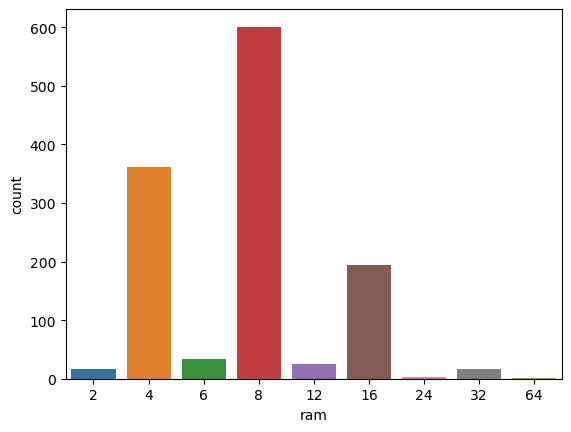

In [91]:
# availability of ram amount in the market

sns.countplot(x='ram',data=df)
plt.show()

- The most prevelant capacities of RAM are 4, 8 and 16GB.

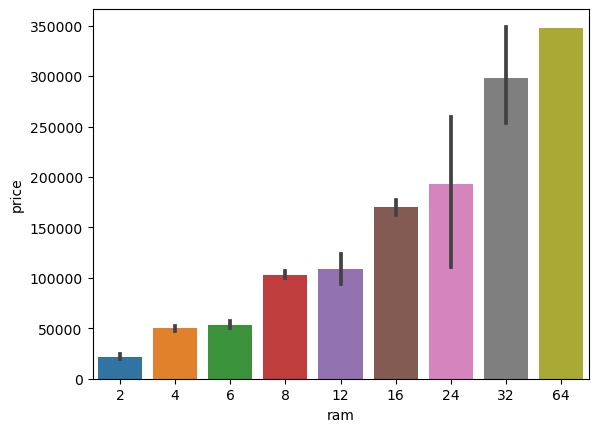

In [92]:
# price vs Ram capacity

sns.barplot(x='ram',y='price',data=df)
plt.show()

- RAM capacities show a linear relationship with the price of the laptops. The price of the laptops increases as the capacity of Ram increases in laptops.

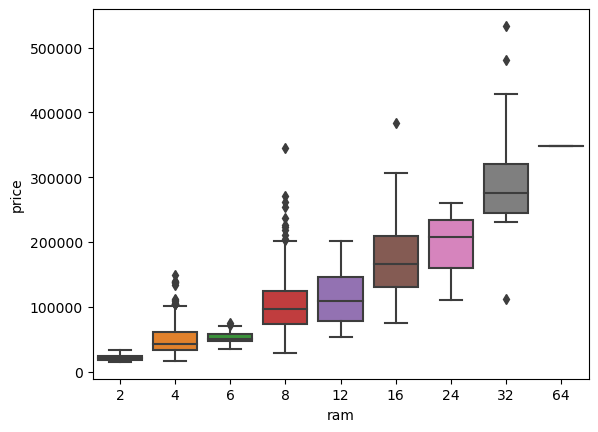

In [93]:
# check for outliers based on the RAM capacities 

sns.boxplot(x='ram',y='price',data=df)
plt.show()

- There is one laptop whose RAM capacity is 32GB but the price is way lower then the rest of the data points.

In [94]:
df_32_lower = (df['price'] < 200000) & (df['ram'] == 32)

df.loc[df_32_lower]

,company,type,size,screen,cpu,ram,storage,gpu,os,weight,price,cpu_model,cpu_brand,cpu_freq,hor_res,ver_res,is_touchscreen,is_IPS,is_HD
901,Asus,gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,32,256GB SSD + 256GB SSD,Nvidia GeForce GTX 980M,Windows 10,3.58kg,111835.76,Intel Core i7,Intel,2.7,1920,1080,0,1,1


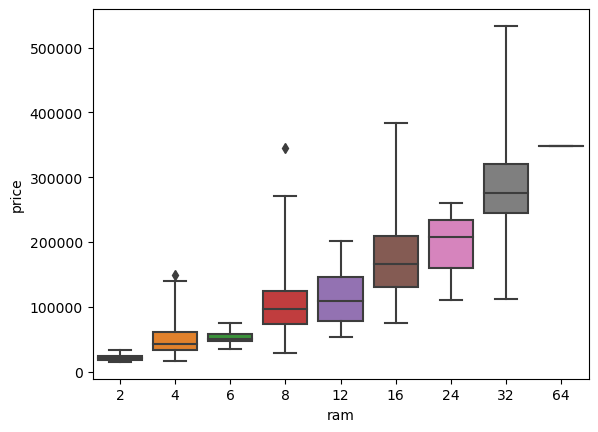

In [95]:
# check for extreme outliers based on the RAM capacities 

sns.boxplot(x='ram',y='price',data=df,whis=3)
plt.show()

In [96]:
# correlation between the RAM and the price column
df.corr(numeric_only=True)['price'].loc['ram']

0.7426977331160611

**The RAM column shows a very high correlation with the price of the laptop**

### Storage

In [97]:
# different kinds of storage in laptops

storage_val_counts = df['storage'].value_counts()
storage_val_counts

256GB SSD                        401
1TB HDD                          214
500GB HDD                        122
512GB SSD                        111
128GB SSD +  1TB HDD              92
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                35
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                11
256GB Flash Storage                8
256GB SSD +  2TB HDD               8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [98]:
# types of storage in different types of laptops

pd.crosstab(index=df['storage'],columns=df['type'])

type,2 in 1 convertible,gaming,netbook,notebook,ultrabook,workstation
storage,,,,,,
1.0TB HDD,0,0,0,1,0,0
1.0TB Hybrid,0,2,0,5,0,0
128GB Flash Storage,0,0,0,2,2,0
128GB HDD,0,0,0,1,0,0
128GB SSD,4,0,5,56,9,0
128GB SSD + 1TB HDD,0,60,0,31,1,0
128GB SSD + 2TB HDD,0,0,0,2,0,0
16GB Flash Storage,0,0,4,3,0,0
16GB SSD,0,0,1,2,0,0


In [99]:
# find storage categories where the storage is in TB

storage_val_counts[storage_val_counts.index.str.contains('TB')]

1TB HDD                          214
128GB SSD +  1TB HDD              92
256GB SSD +  1TB HDD              73
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD               8
1.0TB Hybrid                       7
512GB SSD +  2TB HDD               3
1TB SSD +  1TB HDD                 2
128GB SSD +  2TB HDD               2
64GB Flash Storage +  1TB HDD      1
1TB HDD +  1TB HDD                 1
1.0TB HDD                          1
512GB SSD +  1.0TB Hybrid          1
256GB SSD +  1.0TB Hybrid          1
Name: storage, dtype: int64

In [100]:
# convert Hybrid to HDD

df['storage'].str.replace('Hybrid','HDD')

0                 128GB SSD
1       128GB Flash Storage
2                 256GB SSD
3                 512GB SSD
4                 256GB SSD
               ...         
1270              128GB SSD
1271              512GB SSD
1272     64GB Flash Storage
1273                1TB HDD
1274              500GB HDD
Name: storage, Length: 1251, dtype: object

In [101]:
# covert TB to 1000GB

storage_tb_pat = re.compile('TB|\.\d?TB')

df['storage'] = df['storage'].str.replace(storage_tb_pat,'000GB',regex=True)

In [102]:
# no. of rows in the storage that contains TB

df['storage'].str.contains('TB').sum()

0

In [103]:
# split the storage data
df['HDD'] = 0
df['SSD'] = 0
df['Flash'] = 0

In [104]:
# split the storage column for multiple storage

df[['storage_temp1','storage_temp2']] = df['storage'].str.split('+',expand=True)

In [105]:
# replace None with 0

df['storage_temp2'].fillna(0,inplace=True)

In [106]:
# define the functions to get the values from the storage

def get_storage_values(row,storage_type):
    if row == 0:
        return row
    else:
        if storage_type in row:
            pat = re.compile('(\d+)GB')
            return float(pat.findall(row)[0])
         
# fill in the values for first split

df['HDD'] = df['storage_temp1'].apply(get_storage_values,args=('HDD',)).fillna(0)
df['SSD'] = df['storage_temp1'].apply(get_storage_values,args=('SSD',)).fillna(0)
df['Flash'] = df['storage_temp1'].apply(get_storage_values,args=('Flash',)).fillna(0)

# fill in the values for second split

df['HDD'] = df['HDD'] + df['storage_temp2'].apply(get_storage_values,args=('HDD',)).fillna(0)
df['SSD'] =  df['SSD'] + df['storage_temp2'].apply(get_storage_values,args=('SSD',)).fillna(0)
df['Flash'] = df['Flash'] + df['storage_temp2'].apply(get_storage_values,args=('Flash',)).fillna(0)

In [107]:
df[['storage','HDD','SSD','Flash']].sample(10)

,storage,HDD,SSD,Flash
459,256GB SSD,0.0,256.0,0.0
828,32GB Flash Storage,0.0,0.0,32.0
553,1000GB HDD,1000.0,0.0,0.0
1058,256GB SSD,0.0,256.0,0.0
850,128GB SSD,0.0,128.0,0.0
373,128GB SSD,0.0,128.0,0.0
413,256GB SSD,0.0,256.0,0.0
1211,128GB SSD + 1000GB HDD,1000.0,128.0,0.0
574,500GB HDD,500.0,0.0,0.0
321,1000GB HDD,1000.0,0.0,0.0


In [108]:
# storage type

def storage_type(row):
    if '+' in row:
        return 'Dual'
    else:
        return 'Single'
    
df['storage_type'] = df['storage'].apply(storage_type)

In [109]:
df[['storage','storage_type']].sample(10)

,storage,storage_type
1084,256GB SSD,Single
718,32GB HDD,Single
450,128GB SSD,Single
413,256GB SSD,Single
574,500GB HDD,Single
57,256GB SSD,Single
1097,256GB SSD,Single
895,256GB SSD,Single
982,256GB SSD,Single
375,256GB SSD,Single


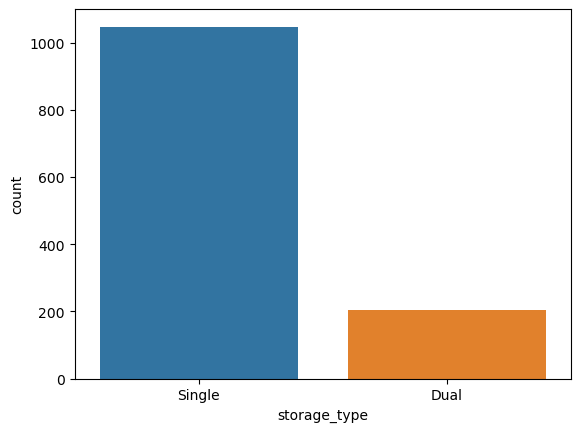

In [110]:
# count of dual vs single storage

sns.countplot(x='storage_type',data=df)
plt.show()

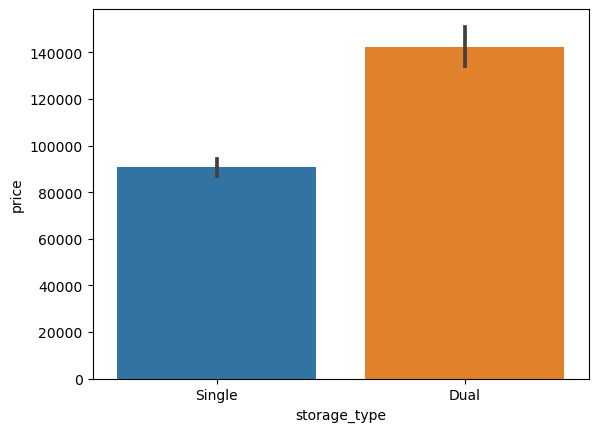

In [111]:
# price of laptops wrt to storage type

sns.barplot(x='storage_type',y='price',data=df)
plt.show()

- Dual Storage laptops laptops are expensive on average as compared to single storage types.

### GPU

In [112]:
# value_counts for GPU
df['gpu'].value_counts()

Intel HD Graphics 620      274
Intel HD Graphics 520      179
Intel UHD Graphics 620      65
Nvidia GeForce GTX 1050     63
Nvidia GeForce GTX 1060     48
                          ... 
Intel Graphics 620           1
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
Nvidia GeForce 960M          1
Name: gpu, Length: 109, dtype: int64

In [113]:
# unique models of gpu

print('The number of unique models of gpu are',df['gpu'].nunique())

The number of unique models of gpu are 109


In [114]:
# unique gpu models are
df['gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [115]:
# get the gpu brand

df['gpu_brand'] = df['gpu'].apply(lambda x: x.split(' ')[0])

In [116]:
# unique brands in the gpu column

print("The number of  different brands of GPU's are",df['gpu_brand'].nunique())
print("The different brands of GPU's are",df['gpu_brand'].unique())

The number of  different brands of GPU's are 3
The different brands of GPU's are ['Intel' 'AMD' 'Nvidia']


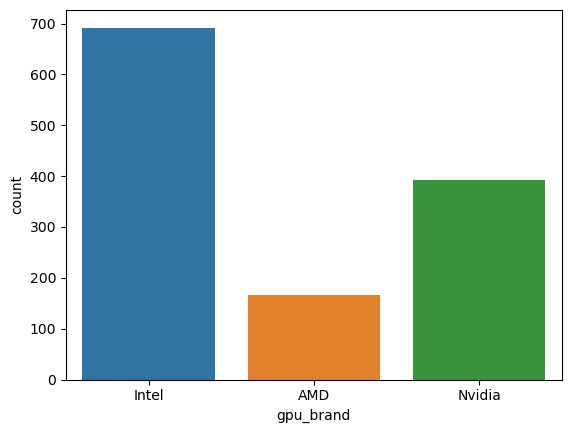

In [117]:
# count distribution of different brands

sns.countplot(x='gpu_brand',data=df)
plt.show()

- The number of `Intel` GPU's are more, followed by `Nvidia` and then `AMD`.

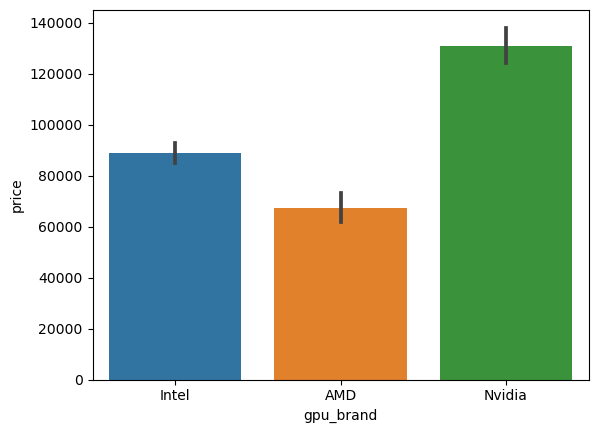

In [118]:
# mean price of GPU's based on their brand

sns.barplot(x='gpu_brand',y='price',data=df)
plt.show()

The gpu_brands do affect the price of the laptops.

In [119]:
# check the sample size

df['gpu_brand'].value_counts()

Intel     692
Nvidia    392
AMD       167
Name: gpu_brand, dtype: int64

No requirement to test for normality as the sample size is greater than 30 for each group.

In [120]:
sample_intel = df[df['gpu_brand'] == 'Intel']
sample_amd = df[df['gpu_brand'] == 'AMD']
sample_nvidia = df[df['gpu_brand'] == 'Nvidia']

In [121]:
# check if the variances of each group are equal

from scipy.stats import levene
sample1 = sample_intel['price']
sample2 = sample_amd['price']
sample3 = sample_nvidia['price']

statistic,p_val = levene(sample1.values,sample2.values,sample3.values)

alpha = 0.05

if p_val <= alpha:
    print('Reject the null hypothesis. The variances of input samples are different')
else:
    print('Fail to reject the null hypothesis. The variances of input samples are similar')
    
print(f'The p value is {p_val}')

Reject the null hypothesis. The variances of input samples are different
The p value is 4.3507283891090356e-13


In [122]:
# relationship b/w gpu_brands and price

from scipy.stats import alexandergovern

sample1 = sample_intel['price']
sample2 = sample_amd['price']
sample3 = sample_nvidia['price']

print(alexandergovern(sample1.values,sample2.values,sample3.values))


AlexanderGovernResult(statistic=159.76535275403305, pvalue=2.029525207517172e-35)


- **The p value is very close to 0 which means that we can reject the null hypothesis and it shows that the GPU brands do impact the price of the laptops and are related to each other**.

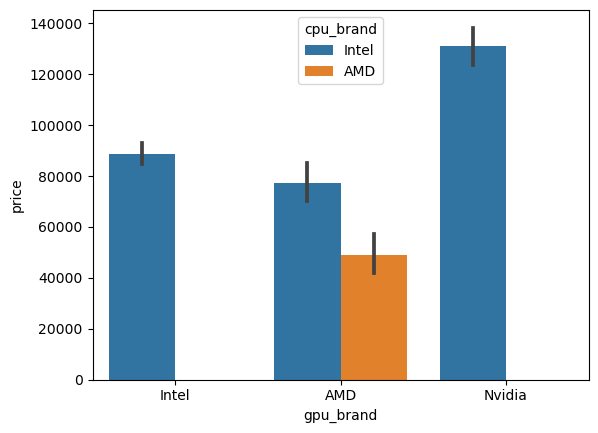

In [123]:
# most common cpu_gpu brand combinations and their prices

sns.barplot(x='gpu_brand',y='price',data=df,hue='cpu_brand')
plt.show()

- The `Intel` and `Nvidia` GPU based laptops have only `Intel` based CPU's in them.
- The `AMD` GPU based laptops have both `Intel` and `AMD` based CPU's in them.

**The Intel CPU based laptops have higher prices on avg comapred to that containg AMD CPU's**

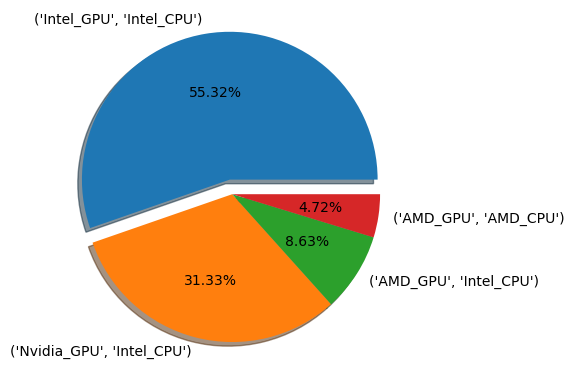

In [124]:
# percentage share of gpu_brands along with cpu_brands

per_gpu = df[['gpu_brand','cpu_brand']].value_counts(normalize=True)
per_gpu.index = [(x[0]+'_GPU',x[1]+'_CPU') for x in per_gpu.index]
plt.pie(x=per_gpu,labels=per_gpu.index,
        autopct='%0.2f%%',shadow=True,
        explode=[0.1,0,0,0])
plt.show()

### Weight

In [125]:
# dtype of weight column
df['weight'].dtype

dtype('O')

In [126]:
# covert the weight column to numerical

df['weight'] = df['weight'].str.replace('kg','')

# convert the string to float
df['weight'] = df['weight'].astype('float32')

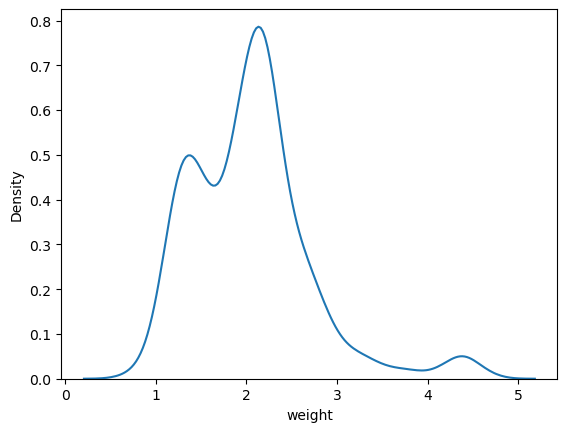

In [127]:
# plot the distribution of the weight column
sns.kdeplot(x='weight',data=df)
plt.show()

The weight column appears to be right-skewed

In [128]:
# skewness of the weight column
df['weight'].skew()

1.1687516

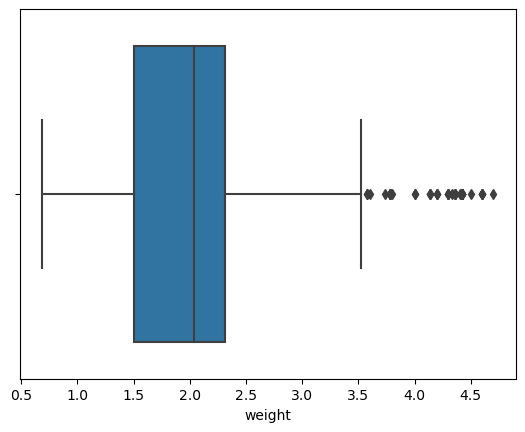

In [129]:
# check the outliers in the weight column
sns.boxplot(x='weight',data=df)
plt.show()

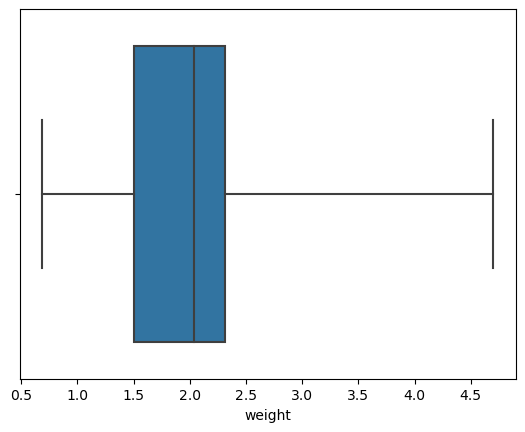

In [130]:
# check for the extreme outliers in the weight column
sns.boxplot(x='weight',data=df,whis=3)
plt.show()

- There appears to be no extreme outliers in the weight column.

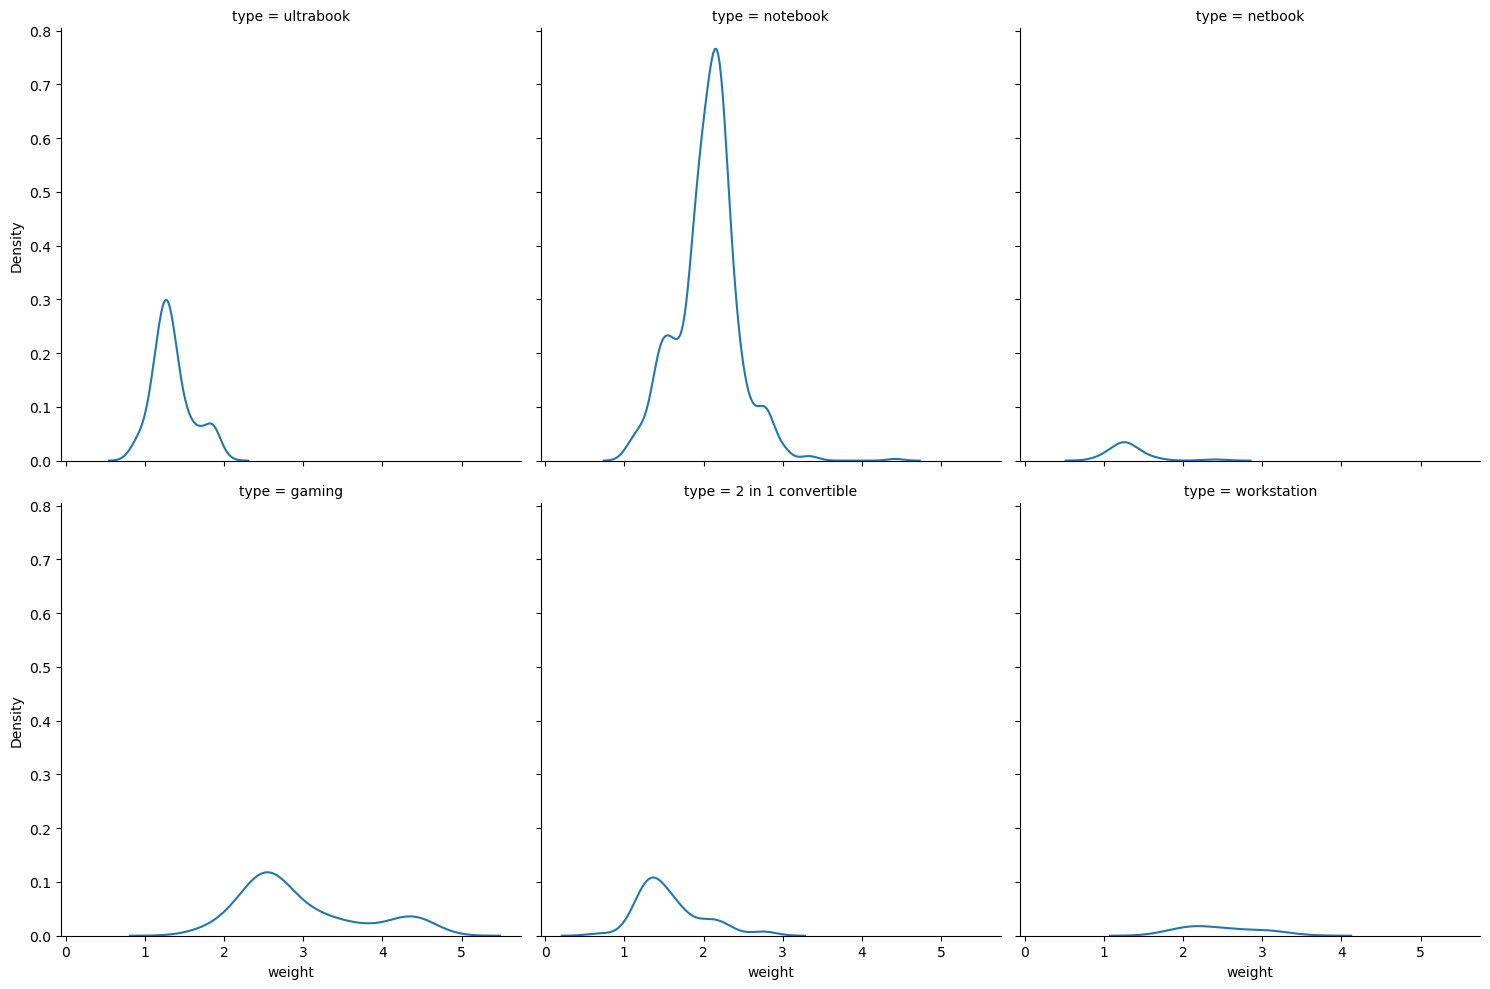

In [131]:
# weight distribution based on type of laptop

sns.displot(x='weight',data=df,col='type',col_wrap=3,kind='kde')
plt.show()

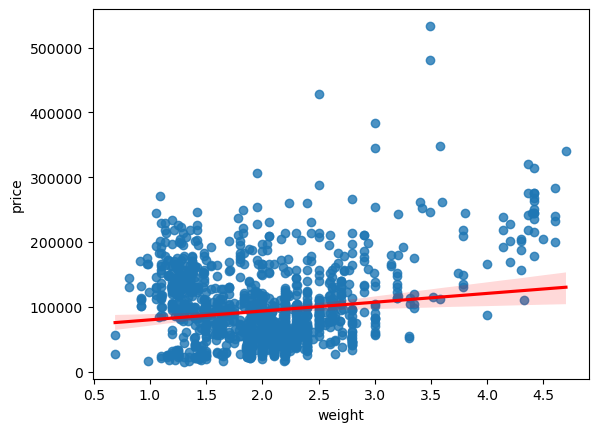

In [132]:
# relationship between weight and price of laptop

sns.regplot(x='weight',y='price',data=df,robust=True,line_kws={'color':'red'})
plt.show()

In [133]:
# correlation betweeen weight and price
df.corr(numeric_only=True)['price'].loc['weight']

0.21683841443133203

- The weight and the price of the laptops shows a slight positive correlation.
- This can be due to the fact that the heavier laptops support powerful hardware or biggere batteries and hence are slightly costlier as well.

### Operating System

In [134]:
df.columns

Index(['company', 'type', 'size', 'screen', 'cpu', 'ram', 'storage', 'gpu',
       'os', 'weight', 'price', 'cpu_model', 'cpu_brand', 'cpu_freq',
       'hor_res', 'ver_res', 'is_touchscreen', 'is_IPS', 'is_HD', 'HDD', 'SSD',
       'Flash', 'storage_temp1', 'storage_temp2', 'storage_type', 'gpu_brand'],
      dtype='object')

In [135]:
# different os in laptops

print('The different categories of OS are', df['os'].unique())

print('The number of different types of OS in laptops are',df['os'].nunique())

The different categories of OS are ['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']
The number of different types of OS in laptops are 9


In [136]:
# OS value counts

df['os'].value_counts()

Windows 10      1028
No OS             66
Linux             57
Windows 7         44
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: os, dtype: int64

In [137]:
# laptop which has OS as Android

df[df['os'] == 'Android']

,company,type,size,screen,cpu,ram,storage,gpu,os,weight,...,is_touchscreen,is_IPS,is_HD,HDD,SSD,Flash,storage_temp1,storage_temp2,storage_type,gpu_brand
50,Lenovo,2 in 1 convertible,11.6,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4,64GB Flash Storage,Intel HD Graphics 400,Android,0.69,...,1,1,1,0.0,0.0,64.0,64GB Flash Storage,0,Single,Intel


- Android is a smartphone OS and the laptop might be having the desktop version of it called as the Chrome OS.

In [138]:
# replace OS categories

os_replace_dict = {
    'Windows 10 S':'Windows 10',
    'Mac OS X':'Mac OS',
    'macOS':'Mac OS',
    'Android':'Chrome OS'
}

df['os'].replace(os_replace_dict,inplace=True)

In [139]:
# OS value counts

df['os'].value_counts()

Windows 10    1036
No OS           66
Linux           57
Windows 7       44
Chrome OS       27
Mac OS          21
Name: os, dtype: int64

In [140]:
# most common OS use by different brands

brand_os_contingency = pd.crosstab(index=df['company'],columns=df['os'])
brand_os_contingency['most_common'] = brand_os_contingency.idxmax(axis=1)
brand_os_contingency['most_common']

company
Acer       Windows 10
Apple          Mac OS
Asus       Windows 10
Dell       Windows 10
HP         Windows 10
Lenovo     Windows 10
MSI        Windows 10
Razer      Windows 10
Samsung    Windows 10
Toshiba    Windows 10
others     Windows 10
Name: most_common, dtype: object

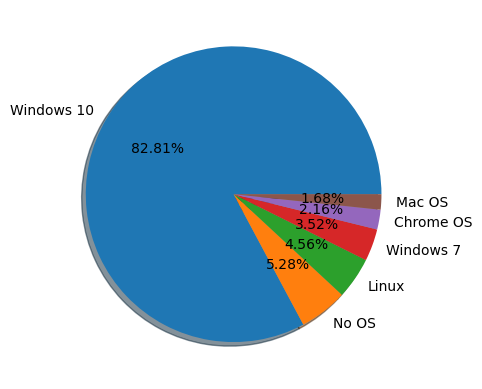

In [142]:
# market share of different OS

plt.pie(df['os'].value_counts(),shadow=True,labels=df['os'].value_counts().index,autopct='%0.2f%%')
plt.show()

## Feature Transformations

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1251 entries, 0 to 1274
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company         1251 non-null   object 
 1   type            1251 non-null   object 
 2   size            1251 non-null   float64
 3   screen          1251 non-null   object 
 4   cpu             1251 non-null   object 
 5   ram             1251 non-null   int32  
 6   storage         1251 non-null   object 
 7   gpu             1251 non-null   object 
 8   os              1251 non-null   object 
 9   weight          1251 non-null   float32
 10  price           1251 non-null   float64
 11  cpu_model       1251 non-null   object 
 12  cpu_brand       1251 non-null   object 
 13  cpu_freq        1251 non-null   float64
 14  hor_res         1251 non-null   int64  
 15  ver_res         1251 non-null   int64  
 16  is_touchscreen  1251 non-null   int32  
 17  is_IPS          1251 non-null   i

In [144]:
# columns to drop

drop_cols = ['screen','cpu','storage','gpu','storage_temp1','storage_temp2']

df.drop(columns=drop_cols,inplace=True)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1251 entries, 0 to 1274
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company         1251 non-null   object 
 1   type            1251 non-null   object 
 2   size            1251 non-null   float64
 3   ram             1251 non-null   int32  
 4   os              1251 non-null   object 
 5   weight          1251 non-null   float32
 6   price           1251 non-null   float64
 7   cpu_model       1251 non-null   object 
 8   cpu_brand       1251 non-null   object 
 9   cpu_freq        1251 non-null   float64
 10  hor_res         1251 non-null   int64  
 11  ver_res         1251 non-null   int64  
 12  is_touchscreen  1251 non-null   int32  
 13  is_IPS          1251 non-null   int32  
 14  is_HD           1251 non-null   int32  
 15  HDD             1251 non-null   float64
 16  SSD             1251 non-null   float64
 17  Flash           1251 non-null   f

In [146]:
# reduce the memory size of the df

df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1251 entries, 0 to 1274
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company         1251 non-null   object 
 1   type            1251 non-null   object 
 2   size            1251 non-null   float64
 3   ram             1251 non-null   int32  
 4   os              1251 non-null   object 
 5   weight          1251 non-null   float32
 6   price           1251 non-null   float64
 7   cpu_model       1251 non-null   object 
 8   cpu_brand       1251 non-null   object 
 9   cpu_freq        1251 non-null   float64
 10  hor_res         1251 non-null   int64  
 11  ver_res         1251 non-null   int64  
 12  is_touchscreen  1251 non-null   int32  
 13  is_IPS          1251 non-null   int32  
 14  is_HD           1251 non-null   int32  
 15  HDD             1251 non-null   float64
 16  SSD             1251 non-null   float64
 17  Flash           1251 non-null   f

In [147]:
# reduce the size of columns

df['size'] = df['size'].astype('float16')
df['ram'] = df['ram'].astype('int16')
df['weight'] = df['weight'].astype('float16')
df['cpu_freq'] = df['cpu_freq'].astype('float16')
df['hor_res'] = df['hor_res'].astype('int16')
df['ver_res'] = df['ver_res'].astype('int16')
df['is_touchscreen'] =  df['is_touchscreen'].astype('int8')
df['is_IPS'] =  df['is_IPS'].astype('int8')
df['is_HD'] =  df['is_HD'].astype('int8')
df['HDD'] = df['HDD'].astype('int16')
df['SSD'] = df['SSD'].astype('int16')
df['Flash'] = df['Flash'].astype('int16')

In [148]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1251 entries, 0 to 1274
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company         1251 non-null   object 
 1   type            1251 non-null   object 
 2   size            1251 non-null   float16
 3   ram             1251 non-null   int16  
 4   os              1251 non-null   object 
 5   weight          1251 non-null   float16
 6   price           1251 non-null   float64
 7   cpu_model       1251 non-null   object 
 8   cpu_brand       1251 non-null   object 
 9   cpu_freq        1251 non-null   float16
 10  hor_res         1251 non-null   int16  
 11  ver_res         1251 non-null   int16  
 12  is_touchscreen  1251 non-null   int8   
 13  is_IPS          1251 non-null   int8   
 14  is_HD           1251 non-null   int8   
 15  HDD             1251 non-null   int16  
 16  SSD             1251 non-null   int16  
 17  Flash           1251 non-null   i

In [149]:
# save the df

df.to_csv('Laptop_Price_data_cleaned.csv')

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1251 entries, 0 to 1274
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company         1251 non-null   object 
 1   type            1251 non-null   object 
 2   size            1251 non-null   float16
 3   ram             1251 non-null   int16  
 4   os              1251 non-null   object 
 5   weight          1251 non-null   float16
 6   price           1251 non-null   float64
 7   cpu_model       1251 non-null   object 
 8   cpu_brand       1251 non-null   object 
 9   cpu_freq        1251 non-null   float16
 10  hor_res         1251 non-null   int16  
 11  ver_res         1251 non-null   int16  
 12  is_touchscreen  1251 non-null   int8   
 13  is_IPS          1251 non-null   int8   
 14  is_HD           1251 non-null   int8   
 15  HDD             1251 non-null   int16  
 16  SSD             1251 non-null   int16  
 17  Flash           1251 non-null   i

In [189]:
# check for the skewness of all continuous numerical columns

num_cont = df.select_dtypes(include=['float16','float32','float64']).columns
num_cont = num_cont[1:]

skew_before_transformations = pd.DataFrame(df[num_cont].skew(),index=num_cont,columns=['skew_original'])
skew_before_transformations

,skew_original
weight,1.169922
price,1.522328
cpu_freq,-0.870117


In [161]:
from scipy.stats import probplot as qq

In [182]:
# plot the distribution and QQ plot of the columns

def qq_plot(column,df):
    plt.figure(figsize=(12,5))
    
    # plot the kde plot
    plt.subplot(1,2,1)
    sns.kdeplot(x=column,data=df)
    plt.title(f'kde plot of {column}')
    
    #polt the QQ plot
    plt.subplot(1,2,2)
    qq(x=df[column],dist='norm',plot=plt)
    plt.title(f'QQ plot of {column}')
    plt.show()

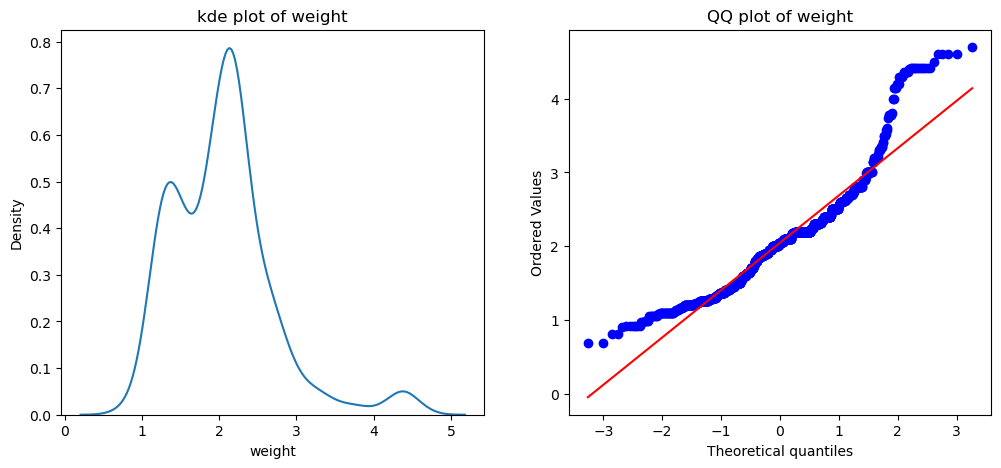

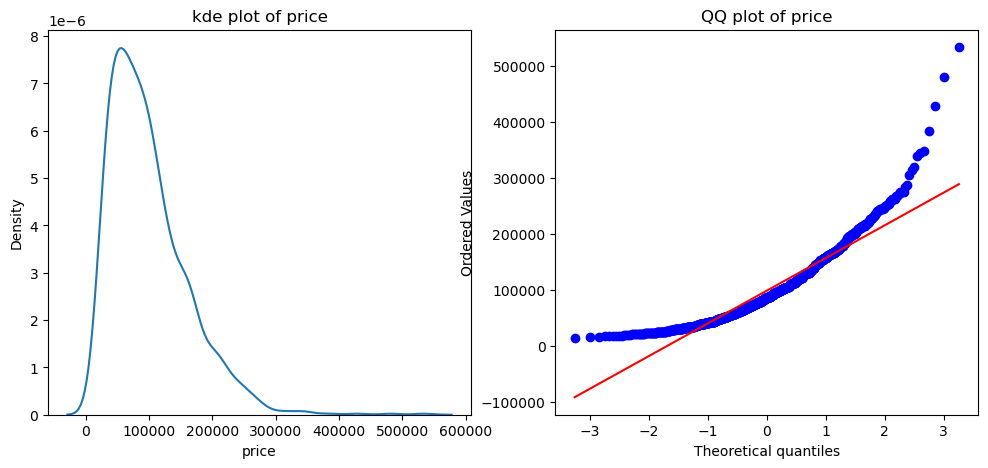

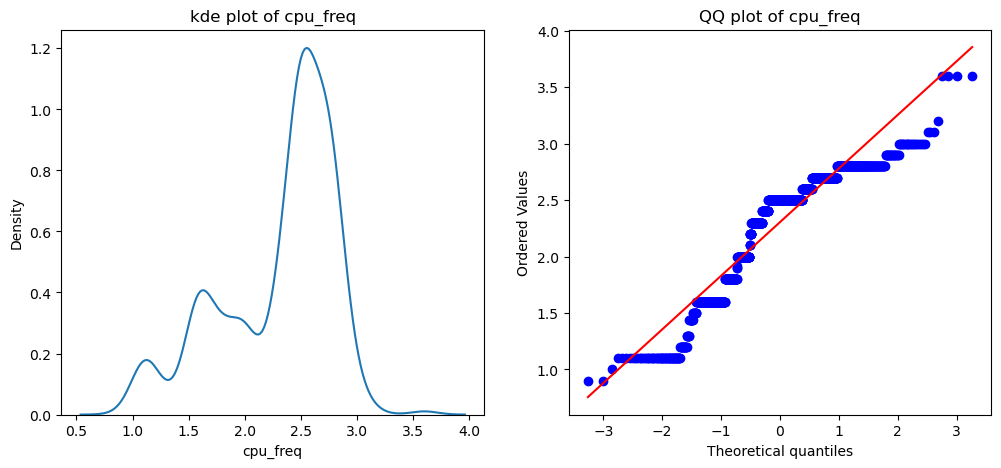

In [183]:
for col in num_cont:
    qq_plot(col,df)

In [185]:
# do boxcox transformations on the columns

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='box-cox').set_output(transform='pandas')

df_trans_boxcox = pt.fit_transform(df[num_cont])


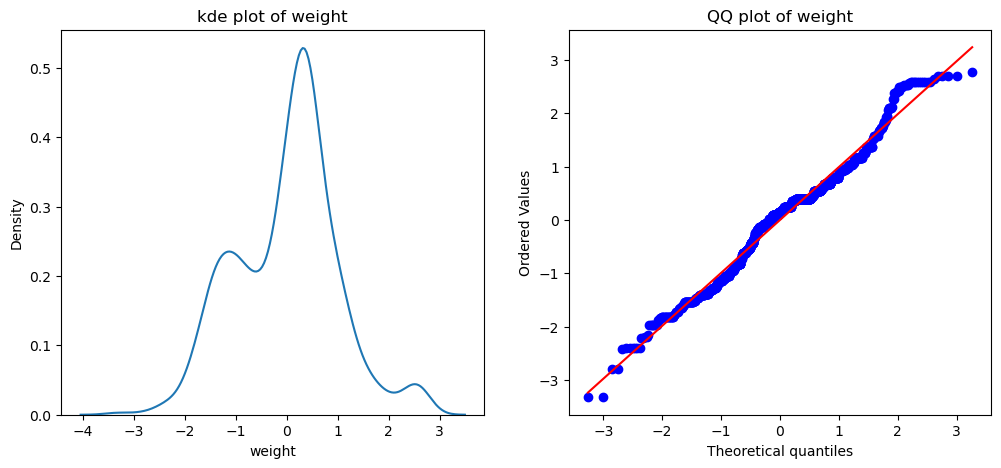

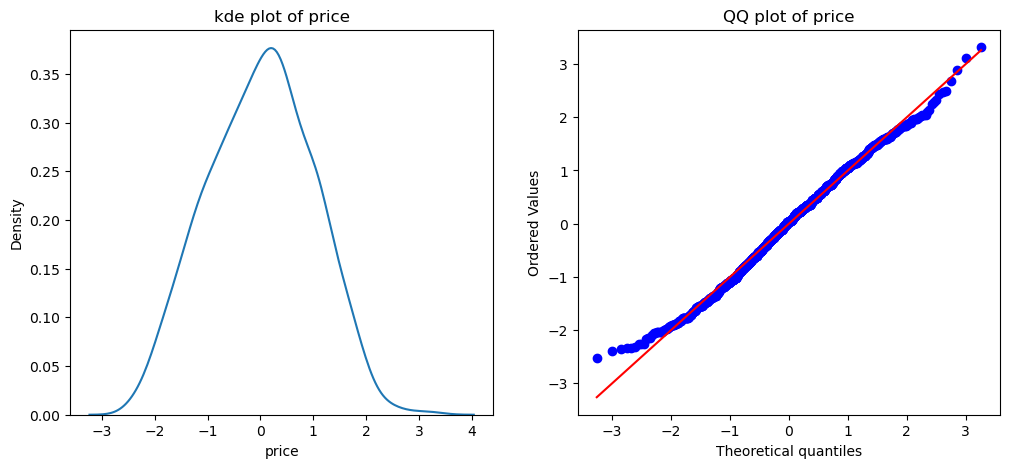

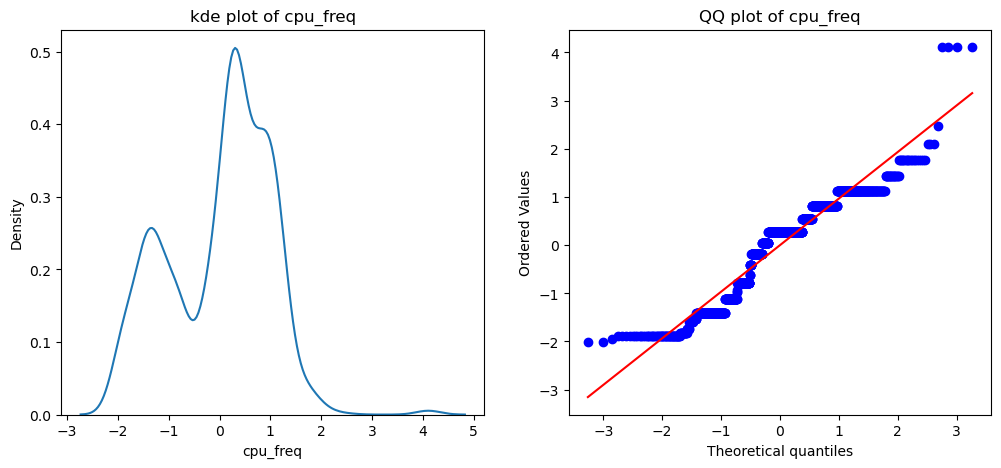

In [186]:
# plot the graphs after transformation

for col in num_cont:
    qq_plot(col,df_trans_boxcox)

In [188]:
# skewness of columns after transformation

skew_after_boxcox = pd.DataFrame(df_trans_boxcox.skew(),index=num_cont,columns=['skew_boxcox'])
skew_after_boxcox

,skew_boxcox
weight,-0.000331
price,-0.011237
cpu_freq,-0.205365


-The QQ plot of size column shows it to be a discrete numerical column type.

In [180]:
# check if the size column is discrete numerical

df['size'].value_counts()

15.601562    647
14.000000    196
13.296875    163
17.296875    163
12.500000     42
11.601562     40
Name: size, dtype: int64

In [190]:
# Do Yheo-Johnson transformation on the continuous columns

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer().set_output(transform='pandas')

df_trans_yj= pt.fit_transform(df[num_cont])

In [191]:
# check for skewness after Yheo-johnson transformation

skew_after_yj = pd.DataFrame(df_trans_yj.skew(),index=num_cont,columns=['skew_yj'])
skew_after_yj

,skew_yj
weight,-0.002370
price,-0.011236
cpu_freq,-0.148074


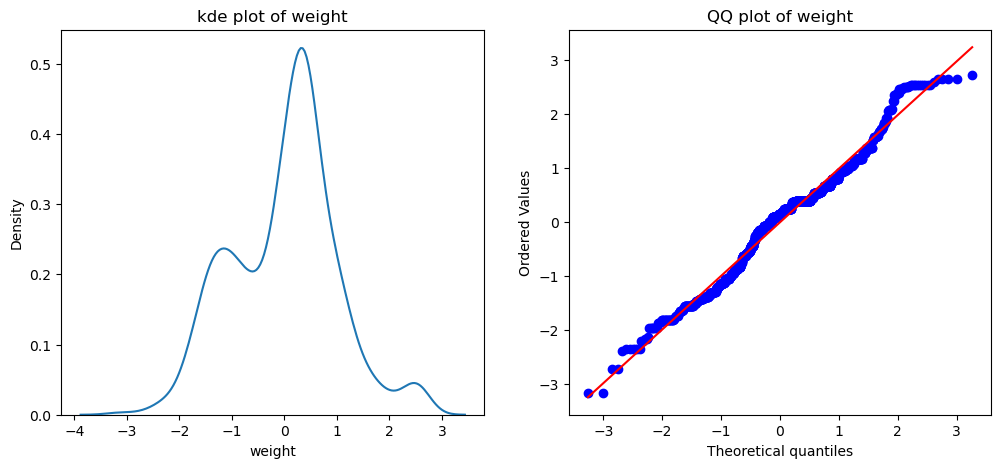

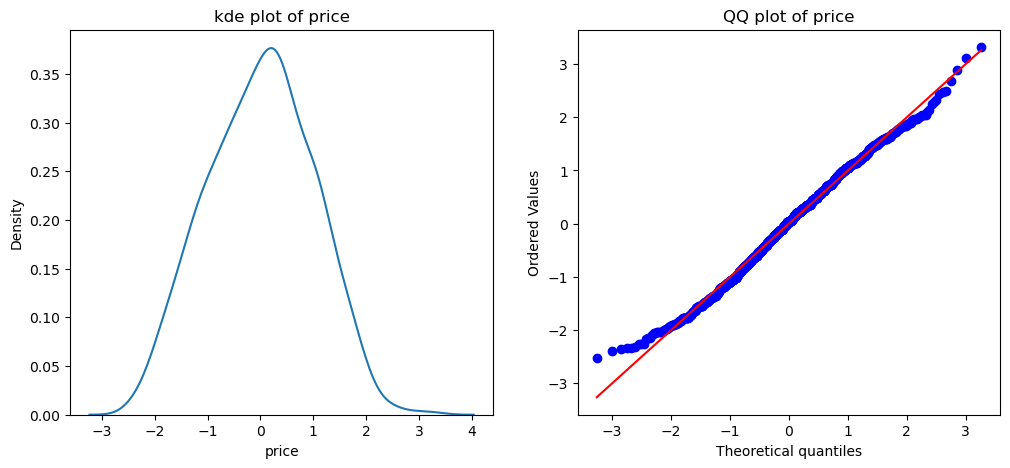

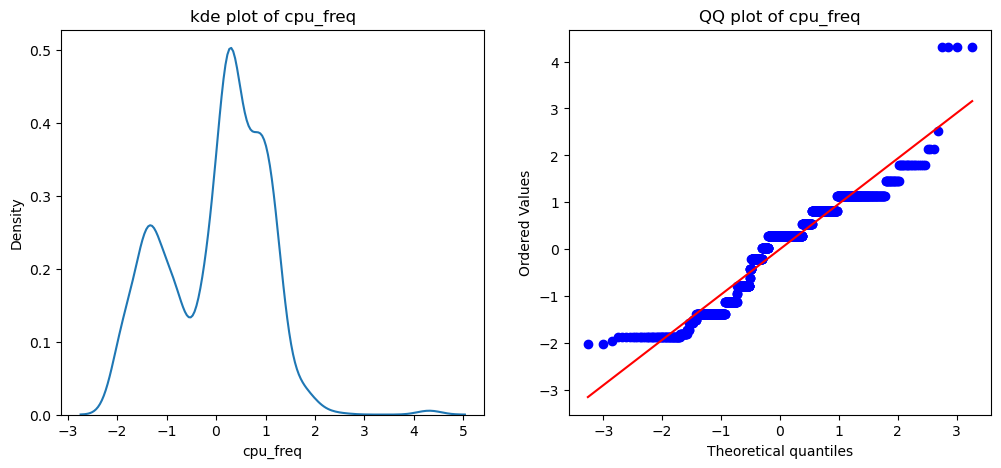

In [192]:
# plot the qq plot after yheo-johnson transformation

for col in num_cont:
    qq_plot(column=col,df=df_trans_yj)

In [193]:
# compare the skewness results of all the transformations

combined_skew = pd.concat(objs=[skew_before_transformations,
                                skew_after_boxcox,
                               skew_after_yj],axis=1)

combined_skew

,skew_original,skew_boxcox,skew_yj
weight,1.169922,-0.000331,-0.002370
price,1.522328,-0.011237,-0.011236
cpu_freq,-0.870117,-0.205365,-0.148074


**From the above result the Yheo-Johnson Transformation is giving better results on the data.**